**Importing necessary Modules**

In [ ]:
import spacy
from sklearn import svm
nlp = spacy.load("en_core_web_sm")
import numpy as np
import pandas as pd




# Reading Data

In [ ]:
df1 = pd.read_csv('Dummy.csv')
df1.head()

,Function,Failure_Condition_A,Failure_Condition_B,Redundancy,Phase,DAL,DALn,Redundancy_n
0,A,Annuciated,Total Loss,three,Landing,Catastrophic,1,3
1,A,Unannuciated,Total Loss,three,Landing,Catastrophic,1,3
2,B,Annuciated,Total Loss,two,RTO,Hazardous,2,2
3,B,Unannuciated,Total Loss,two,RTO,Hazardous,2,2
4,C,Annuciated,Total Loss,one,Taxi,Major,3,1


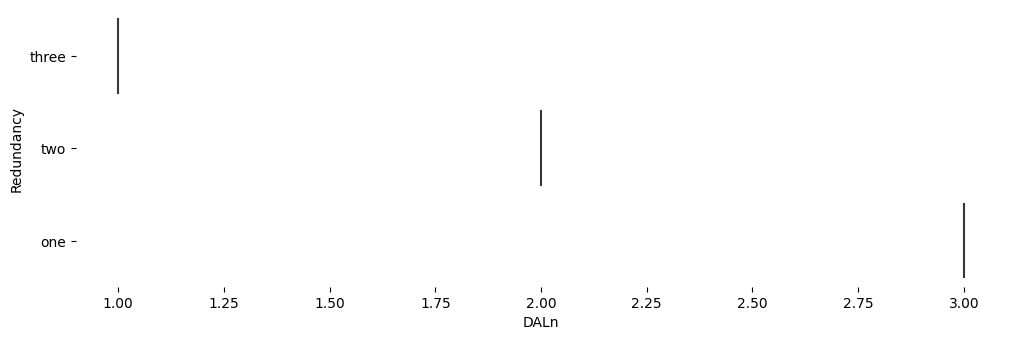

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Redundancy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='DALn', y='Redundancy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df =df1.drop(columns = ['DALn','Redundancy_n'], axis = 1)
df.head()

,Function,Failure_Condition_A,Failure_Condition_B,Redundancy,Phase,DAL
0,A,Annuciated,Total Loss,three,Landing,Catastrophic
1,A,Unannuciated,Total Loss,three,Landing,Catastrophic
2,B,Annuciated,Total Loss,two,RTO,Hazardous
3,B,Unannuciated,Total Loss,two,RTO,Hazardous
4,C,Annuciated,Total Loss,one,Taxi,Major


In [ ]:

df.columns = df.columns.str.replace(' ', '_')

df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

df.columns = df.columns.str.replace('[^\w\s]', '')

df = df.applymap(lambda x: ''.join(e for e in str(x) if e.isalnum() or e.isspace()) if isinstance(x, str) else x)

df.head()

<ipython-input-4-b4c229825488>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')


,Function,Failure_Condition_A,Failure_Condition_B,Redundancy,Phase,DAL
0,a,annuciated,total loss,three,landing,catastrophic
1,a,unannuciated,total loss,three,landing,catastrophic
2,b,annuciated,total loss,two,rto,hazardous
3,b,unannuciated,total loss,two,rto,hazardous
4,c,annuciated,total loss,one,taxi,major


In [ ]:
X = df.drop('DAL', axis = 'columns')
X.head()
y = df.DAL
y.head()

0    catastrophic
1    catastrophic
2       hazardous
3       hazardous
4           major
Name: DAL, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0,shuffle = True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(12, 5) (12,)
(4, 5) (4,)


In [ ]:
X_train

,Function,Failure_Condition_A,Failure_Condition_B,Redundancy,Phase
13,c,unannuciated,partial loss,one,taxi
4,c,annuciated,total loss,one,taxi
2,b,annuciated,total loss,two,rto
14,d,annuciated,partial loss,zero,cruise
10,b,annuciated,partial loss,two,rto
7,d,unannuciated,total loss,zero,cruise
15,d,unannuciated,partial loss,zero,cruise
11,b,unannuciated,partial loss,two,rto
3,b,unannuciated,total loss,two,rto
0,a,annuciated,total loss,three,landing


# getting vectors


In [ ]:

docs = [nlp(text) for text in (X_train['Function'])]
# print(docs)
x1_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_train['Function']):
  a = doc.vector
  x1_vecs.append(a)
print(docs)
# print(x1_vecs)

[c, c, b , d, b , d, d, b , b , a, c, c]


In [ ]:

docs = [nlp(text) for text in (X_train['Failure_Condition_A'])]
# print(docs)
x2_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_train['Failure_Condition_A']):
  a = doc.vector
  x2_vecs.append(a)
print(docs)
# print(x1_vecs)

[unannuciated, annuciated, annuciated, annuciated, annuciated, unannuciated, unannuciated, unannuciated, unannuciated, annuciated, unannuciated, annuciated]


In [ ]:

docs = [nlp(text) for text in (X_train['Failure_Condition_B'])]
# print(docs)
x3_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_train['Failure_Condition_B']):
  a = doc.vector
  x3_vecs.append(a)
print(docs)
# print(x1_vecs)

[partial loss, total loss, total loss, partial loss, partial loss, total loss, partial loss, partial loss, total loss, total loss, total loss, partial loss]


In [ ]:
docs = [nlp(text) for text in (X_train['Phase'])]
# print(docs)
x4_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_train['Failure_Condition_A']):
  a = doc.vector
  x4_vecs.append(a)
print(docs)
# print(x1_vecs)

[taxi, taxi, rto, cruise, rto, cruise, cruise, rto, rto, landing, taxi, taxi]


In [ ]:
docs = [nlp(text) for text in (X_train['Redundancy'])]
# print(docs)
x5_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_train['Redundancy']):
  a = doc.vector
  x5_vecs.append(a)
print(docs)
# print(x1_vecs)

[one, one, two, zero, two, zero, zero, two, two, three, one, one]


In [ ]:
x1_series = pd.Series(x1_vecs, name='Function')
x2_series = pd.Series(x2_vecs, name='Failure_Condition_A')
x3_series = pd.Series(x3_vecs, name='Failure_Condition_B')
x4_series = pd.Series(x4_vecs, name='Phase')
x5_series = pd.Series(x5_vecs, name='Redundancy')
X_train_vecs = pd.concat([x1_series, x2_series, x3_series, x4_series, x5_series], axis = 1)

X_train_vecs.head()


,Function,Failure_Condition_A,Failure_Condition_B,Phase,Redundancy
0,"[0.21607049, -0.2988956, -0.9168757, -0.476875...","[-0.5354271, -0.16049272, -0.22418448, 0.14555...","[-0.7667092, -0.47542673, -0.33949196, 0.75530...","[-0.5354271, -0.16049272, -0.22418448, 0.14555...","[-2.0042644, -0.59378195, -0.26726377, -0.0049..."
1,"[0.21607049, -0.2988956, -0.9168757, -0.476875...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-0.73148906, -0.49542916, -0.06806511, 0.4612...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-2.0042644, -0.59378195, -0.26726377, -0.0049..."
2,"[0.0576514, -0.17174049, -0.10360056, -0.36954...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-0.73148906, -0.49542916, -0.06806511, 0.4612...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-1.859828, -0.30996686, -0.6510448, 1.8166609..."
3,"[-0.35451978, -0.22099692, -0.19406146, -0.372...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-0.7667092, -0.47542673, -0.33949196, 0.75530...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-1.1023475, -1.1111697, -1.1009969, 0.9249708..."
4,"[0.0576514, -0.17174049, -0.10360056, -0.36954...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-0.7667092, -0.47542673, -0.33949196, 0.75530...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-1.859828, -0.30996686, -0.6510448, 1.8166609..."


In [ ]:
x5_series[0]

array([-2.0042644 , -0.59378195, -0.26726377, -0.00490919,  1.0312271 ,
       -0.5833034 , -0.5703868 ,  1.4644222 , -1.11019   ,  0.22369781,
        0.08902308,  0.2836306 , -0.00919679,  1.8406525 , -0.39541894,
        1.2296307 , -1.4323273 , -0.35188782,  0.903169  ,  0.09240912,
       -0.08163834,  2.1733172 ,  1.7222954 , -0.4086838 ,  1.4755852 ,
        0.22852072, -0.02877408,  0.19466436,  0.3091563 , -1.0013489 ,
        1.2063307 ,  0.3456577 ,  1.3359267 , -0.5620378 ,  0.19292593,
       -0.27657032, -0.01668406,  1.608798  ,  0.42143726, -0.17884201,
       -0.22837453, -0.8557014 ,  0.3458626 , -0.4480232 , -0.23912358,
       -0.04594178, -1.3107677 ,  0.05449052,  0.15565339, -0.3282135 ,
        0.5943185 ,  0.38641137,  0.41647446, -1.2793295 ,  1.342877  ,
       -0.67583525,  1.0022621 , -0.9224812 , -0.16584197,  0.01682237,
        0.40273774, -0.980182  , -0.08303694, -1.1180841 ,  0.706125  ,
        1.2632625 , -1.7351571 , -0.9966135 , -0.05866301,  0.36

In [ ]:
X_train_vecs.isnull().sum()

Function               0
Failure_Condition_A    0
Failure_Condition_B    0
Phase                  0
Redundancy             0
dtype: int64

In [ ]:
docs = [nlp(text) for text in (X_test['Function'])]
  # print(docs)
xt1_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_test['Function']):
  a = doc.vector
  xt1_vecs.append(a)
print(docs)
# print(x1_vecs)

[a, d, a, a]


In [ ]:
docs = [nlp(text) for text in (X_test['Failure_Condition_A'])]
# print(docs)
xt2_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_test['Failure_Condition_A']):
  a = doc.vector
  xt2_vecs.append(a)
print(docs)
# print(x1_vecs)

[unannuciated, annuciated, annuciated, unannuciated]


In [ ]:
docs = [nlp(text) for text in (X_test['Failure_Condition_B'])]
# print(docs)
xt3_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_test['Failure_Condition_B']):
  a = doc.vector
  xt3_vecs.append(a)
print(docs)
# print(x1_vecs)

[total loss, total loss, partial loss, partial loss]


In [ ]:
docs = [nlp(text) for text in (X_test['Phase'])]
# print(docs)
xt4_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_test['Phase']):
  a = doc.vector
  xt4_vecs.append(a)
print(docs)
# print(x1_vecs)

[landing, cruise, landing, landing]


In [ ]:
docs = [nlp(text) for text in (X_test['Redundancy'])]
# print(docs)
xt5_vecs = []
trf = spacy.load('en_core_web_sm')
for doc in trf.pipe(X_test['Redundancy']):
  a = doc.vector
  xt5_vecs.append(a)
print(docs)
# print(x1_vecs)

[three, zero, three, three]


In [ ]:
# X_test.Redundancy = [0,1]
# print(X_test.Redundancy)

In [ ]:
xt1_series = pd.Series(xt1_vecs, name='Function')
xt2_series = pd.Series(xt2_vecs, name='Failure_Condition_A')
xt3_series = pd.Series(xt3_vecs, name='Failure_Condition_B')
xt4_series = pd.Series(xt4_vecs, name='Phase')
xt5_series = pd.Series(xt5_vecs, name='Redundancy')
X_test_vecs = pd.concat([xt1_series, xt2_series, xt3_series, xt4_series, xt5_series], axis = 1)

X_test_vecs.head()

,Function,Failure_Condition_A,Failure_Condition_B,Phase,Redundancy
0,"[0.44562447, 0.040819645, -1.0442011, 0.977903...","[-0.5354271, -0.16049272, -0.22418448, 0.14555...","[-0.73148906, -0.49542916, -0.06806511, 0.4612...","[-1.9309051, 0.555068, -0.09508823, 0.17262866...","[-1.3622587, -0.67520416, -0.7388063, 1.473462..."
1,"[-0.35451978, -0.22099692, -0.19406146, -0.372...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-0.73148906, -0.49542916, -0.06806511, 0.4612...","[-0.7889166, -0.25640965, -0.55056226, 0.86167...","[-1.1023475, -1.1111697, -1.1009969, 0.9249708..."
2,"[0.44562447, 0.040819645, -1.0442011, 0.977903...","[-0.7254268, -0.33600435, -0.5738592, -0.16493...","[-0.7667092, -0.47542673, -0.33949196, 0.75530...","[-1.9309051, 0.555068, -0.09508823, 0.17262866...","[-1.3622587, -0.67520416, -0.7388063, 1.473462..."
3,"[0.44562447, 0.040819645, -1.0442011, 0.977903...","[-0.5354271, -0.16049272, -0.22418448, 0.14555...","[-0.7667092, -0.47542673, -0.33949196, 0.75530...","[-1.9309051, 0.555068, -0.09508823, 0.17262866...","[-1.3622587, -0.67520416, -0.7388063, 1.473462..."


In [ ]:
for column in X_train.columns:
  docs = [nlp(text) for text in (X_train[column])]
  # print(docs)
  x1_vecs = []
  trf = spacy.load('en_core_web_sm')
  for doc in trf.pipe(X_train[column]):
    a = doc.vector
    x1_vecs.append(a)
  print(docs)

[c, c, b , d, b , d, d, b , b , a, c, c]
[unannuciated, annuciated, annuciated, annuciated, annuciated, unannuciated, unannuciated, unannuciated, unannuciated, annuciated, unannuciated, annuciated]
[partial loss, total loss, total loss, partial loss, partial loss, total loss, partial loss, partial loss, total loss, total loss, total loss, partial loss]
[one, one, two, zero, two, zero, zero, two, two, three, one, one]
[taxi, taxi, rto, cruise, rto, cruise, cruise, rto, rto, landing, taxi, taxi]


In [ ]:

# Create and train the SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(x1_vecs, y_train)






SVC(kernel='linear')

In [ ]:
for column in X_test.columns:
  docs = [nlp(text) for text in (X_test[column])]
  # print(docs)
  x2_vecs = []
  trf = spacy.load('en_core_web_sm')
  for doc in trf.pipe(X_test[column]):
    a = doc.vector
    x2_vecs.append(a)
  print(docs)

[a, d, a, a]
[unannuciated, annuciated, annuciated, unannuciated]
[total loss, total loss, partial loss, partial loss]
[three, zero, three, three]
[landing, cruise, landing, landing]


In [ ]:
x2_vecs[0]

array([-1.9309051 ,  0.555068  , -0.09508823,  0.17262866, -0.51636523,
        0.32842317,  0.12112061, -0.19218272,  0.09988334, -0.20710482,
       -0.7618288 , -1.2783501 , -0.9382203 , -0.69890386,  0.39903647,
        1.2404423 , -0.2061134 , -1.4820112 , -0.5113801 ,  1.1427152 ,
       -0.97268134,  2.425116  ,  0.1157794 ,  0.00997079,  0.10507547,
        1.4013219 ,  1.8655468 ,  2.0476353 , -0.26431677,  0.08402914,
        0.54694104, -0.4029309 ,  0.71792877, -1.2603735 ,  0.18562874,
       -1.8156366 , -0.5858816 ,  0.43793434, -0.01352552,  0.45981753,
        0.33564976,  0.00755808, -0.6020552 ,  0.780608  ,  0.19381806,
       -1.2171187 ,  1.0656848 , -0.4352197 ,  1.8296999 , -0.60853124,
        0.05301738,  0.90439254, -0.8147022 , -0.82868093, -0.00280364,
       -0.52215743,  1.011665  ,  1.1838975 , -0.83590126, -0.6510148 ,
       -0.8890255 ,  0.7627728 , -1.4770802 ,  1.9836466 ,  0.32718167,
        0.46578926, -0.2784701 , -0.5016527 ,  0.7936347 , -0.83

In [ ]:
y_result = clf.predict(x2_vecs)
print(y_result)

['catastrophic' 'minor' 'catastrophic' 'catastrophic']


In [ ]:
accuracy = clf.score(x2_vecs, y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.75


In [ ]:
y_test

1    catastrophic
6           minor
8       hazardous
9    catastrophic
Name: DAL, dtype: object

In [ ]:
correlation = df1['DALn'].corr(df1['Redundancy_n'])
print(f"Correlation between DAL and Redundancy: {correlation}")


Correlation between DAL and Redundancy: -0.8914003559538187


In [ ]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split


In [ ]:
print("Column 1 dimensions:", x1_vecs[0].shape)
print("Column 2 dimensions:", x2_vecs[0].shape)
print("Column 3 dimensions:", x3_vecs[0].shape)
print("Column 4 dimensions:", x4_vecs[0].shape)
print("Column 5 dimensions:", x5_vecs[0].shape)


Column 1 dimensions: (96,)
Column 2 dimensions: (96,)
Column 3 dimensions: (96,)
Column 4 dimensions: (96,)
Column 5 dimensions: (96,)
